In [2]:
%matplotlib inline

## Software Comparison Project with NIDM-Results

This notebook demonstates how to reproduce the results presented in the Software Comparison Project publication using NIDM-Results packs available at [NeuroVault (2238)](http://neurovault.org/collections/2238/). We give visual comparisons between axial slices of the excursion set images and T-statistics for each software packages, as well as quantitative comparisons with Euler characteristics, Bland-Altman plots and Sørensen–Dice coefficients.


In [3]:
import os
from subprocess import check_call
import zipfile
import json
from urllib2 import urlopen, URLError, HTTPError
from urllib2 import Request
from nilearn import plotting

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Download the NIDM-Results packs from NeuroVault

 - Query NeuroVault's API to retreive all NIDM packs in collection 2238
 - Download and save the packs in sub-folder `input/ds109/` 

In [4]:
nv_collection ='2238'
study ='ds109'


request = Request('http://neurovault.org/api/collections/' + nv_collection + '/nidm_results/?limit=184&format=json')
response = urlopen(request)
elevations = response.read()
data = json.loads(elevations)

pwd = os.path.dirname(os.path.realpath('__file__'))
input_dir = os.path.join(pwd, "input")
data_dir = os.path.join(input_dir, study)

if not os.path.isdir(data_dir):
    if not os.path.isdir(input_dir):
        os.makedirs(input_dir)
    os.makedirs(data_dir)

for nidm_result in data["results"]:
    url = nidm_result["zip_file"]
    study_name = nidm_result["name"]

    localzip = os.path.join(data_dir, study_name + ".zip")
    localzip_rel = localzip.replace(pwd, '.')
    if not os.path.isfile(localzip):
        # Copy .nidm.zip export locally in a the data directory
        try:
            f = urlopen(url)
            print("downloading " + url + " at " + localzip_rel)
            with open(localzip, "wb") as local_file:
                local_file.write(f.read())
        except HTTPError, e:
            raise Exception(["HTTP Error:" + e.code + url])
        except URLError, e:
            raise Exception(["URL Error:" + e.reason + url])
    else:
        print(url + " already downloaded at " + localzip_rel)

for afni_image, local_name in (
        ('Negative_clustered_t_stat.nii.gz', 'afni_exc_set_neg.nii.gz'), 
        ('Positive_clustered_t_stat.nii.gz', 'afni_exc_set_pos.nii.gz'),
        ('3dMEMA_result_t_stat_masked.nii.gz', 'afni_stat.nii.gz'),
        ('mask.nii.gz', 'afni_mask.nii.gz')):

    url = "http://neurovault.org/media/images/" + nv_collection + '/' + afni_image
    local_file = os.path.join(data_dir, local_name)
    if not os.path.isfile(local_file):
        # Copy file locally in a the data directory
        try:
            f = urlopen(url)
            print("downloading " + url + " at " + local_file)
            with open(local_file, "wb") as local_fid:
                local_fid.write(f.read())
        except HTTPError, e:
            raise Exception(["HTTP Error:" + str(e.code) + url])
        except URLError, e:
            raise Exception(["URL Error:" + e.reason + url])
    else:
        print(url + " already downloaded at " + local_file)

for euler_char_file, local_name in (
        ('AFNI/LEVEL2/euler_chars.csv', 'afni_euler_chars.csv'),
        ('FSL/LEVEL2/group.gfeat/cope1.feat/stats/euler_chars.csv', 'fsl_euler_chars.csv'),
        ('SPM/LEVEL2/euler_chars.csv', 'spm_euler_chars.csv')):

    url = "https://raw.githubusercontent.com/AlexBowring/Software_Comparison/master/" + study + "/" + euler_char_file
    local_file = os.path.join(data_dir, local_name)
    if not os.path.isfile(local_file):
        # Copy file locally in a the data directory
        try:
            f = urlopen(url)
            print("downloading " + url + " at " + local_file)
            with open(local_file, "wb") as local_fid:
                local_fid.write(f.read())
        except HTTPError, e:
            raise Exception(["HTTP Error:" + str(e.code) + url])
        except URLError, e:
            raise Exception(["URL Error:" + e.reason + url])
    else:
        print(url + " already downloaded at " + local_file)
        
for resliced_image in (('afni_fsl_reslice.nii.gz', 'afni_reslice_fsl.nii.gz', 'afni_fsl_pos_exc_reslice.nii.gz','afni_fsl_neg_exc_reslice.nii.gz',
                        'afni_spm_reslice.nii.gz', 'afni_reslice_spm.nii.gz', 'afni_spm_pos_exc_reslice.nii.gz','afni_spm_neg_exc_reslice.nii.gz',
                        'fsl_spm_reslice.nii.gz', 'fsl_reslice_spm.nii.gz', 'fsl_spm_pos_exc_reslice.nii.gz','fsl_spm_neg_exc_reslice.nii.gz')):
    url = "http://neurovault.org/media/images/" + nv_collection + '/' + resliced_image
    local_file = os.path.join(data_dir, resliced_image)
    if not os.path.isfile(local_file):
        # Copy file locally in a the data directory
        try:
            f = urlopen(url)
            print("downloading " + url + " at " + local_file)
            with open(local_file, "wb") as local_fid:
                local_fid.write(f.read())
        except HTTPError, e:
            raise Exception(["HTTP Error:" + str(e.code) + url])
        except URLError, e:
            raise Exception(["URL Error:" + e.reason + url])
    else:
        print(url + " already downloaded at " + local_file)

http://neurovault.org/collections/2238/group.gfeat.nidm.zip already downloaded at ./input/ds109/group.gfeat.nidm.zip
http://neurovault.org/collections/2238/spm_0001.nidm.zip already downloaded at ./input/ds109/spm_0001.nidm.zip
http://neurovault.org/collections/2238/spm_0002.nidm.zip already downloaded at ./input/ds109/spm_0002.nidm.zip
http://neurovault.org/media/images/2238/Negative_clustered_t_stat.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/input/ds109/afni_exc_set_neg.nii.gz
http://neurovault.org/media/images/2238/Positive_clustered_t_stat.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/input/ds109/afni_exc_set_pos.nii.gz
http://neurovault.org/media/images/2238/3dMEMA_result_t_stat_masked.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/input/ds109/afni_stat.nii.gz
http://neurovault.org/media/images/2238/mask.nii.gz already downloaded at /Users/maullz/Desktop/Software_Comparison/input/ds109/afni_mask.nii.gz
ht

In [5]:
import zipfile
import shutil

# *** SPM group activations
spm_pack = open('./input/' + study + '/spm_0001.nidm.zip', 'rb')
z = zipfile.ZipFile(spm_pack)
z.extract('ExcursionSet.nii.gz', './input/' + study + '/')
z.extract('Mask.nii.gz', './input/' + study + '/')
z.extract('TStatistic.nii.gz', './input/' + study + '/')

# Thresholded statistics
spm_exc_set_file = './input/' + study + '/spm_exc_set.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet.nii.gz', spm_exc_set_file)

# Unthresholded statistics
spm_stat_file = './input/' + study + '/spm_stat.nii.gz'
shutil.move('./input/' + study + '/TStatistic.nii.gz', spm_stat_file)

# Analysis mask
spm_mask_file = './input/' + study + '/spm_mask.nii.gz'
shutil.move('./input/' + study + '/Mask.nii.gz', spm_mask_file)

# *** SPM group deactivations
spm_deact_pack = open('./input/' + study + '/spm_0002.nidm.zip', 'rb')
z = zipfile.ZipFile(spm_deact_pack)
z.extract('ExcursionSet.nii.gz', './input/' + study + '/')

# Thresholded statistics
spm_exc_set_file_neg = './input/' + study + '/spm_exc_set_neg.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet.nii.gz', spm_exc_set_file_neg)

# *** FSL group activations and deactivations
fsl_pack = open('./input/' + study + '/group.gfeat.nidm.zip', 'rb')
z = zipfile.ZipFile(fsl_pack)
z.extract('ExcursionSet_T001.nii.gz', './input/' + study + '/')
z.extract('ExcursionSet_T002.nii.gz', './input/' + study + '/')
z.extract('Mask.nii.gz', './input/' + study + '/')
z.extract('TStatistic_T001.nii.gz', './input/' + study + '/')

# Thresholded statistics
fsl_exc_set_file = './input/' + study + '/fsl_exc_set.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet_T001.nii.gz', fsl_exc_set_file)
fsl_exc_set_file_neg = './input/' + study + '/fsl_exc_set_neg.nii.gz'
shutil.move('./input/' + study + '/ExcursionSet_T002.nii.gz', fsl_exc_set_file_neg)

# Unthresholded statistics
fsl_stat_file = './input/' + study + '/fsl_stat.nii.gz'
shutil.move('./input/' + study + '/TStatistic_T001.nii.gz', fsl_stat_file)

# Analysis mask
fsl_mask_file = './input/' + study + '/fsl_mask.nii.gz'
shutil.move('./input/' + study + '/Mask.nii.gz', fsl_mask_file)

# *** AFNI group activations and deactivations
afni_mask_file = './input/' + study + '/afni_mask.nii.gz'
afni_exc_set_file = './input/' + study + '/afni_exc_set_pos.nii.gz'
afni_exc_set_file_neg = './input/' + study + '/afni_exc_set_neg.nii.gz'
afni_stat_file = './input/' + study + '/afni_stat.nii.gz'

exc_sets = dict()
exc_sets["spm"] = (spm_mask_file, (spm_exc_set_file, spm_exc_set_file_neg), spm_stat_file)
exc_sets["fsl"] = (fsl_mask_file, (fsl_exc_set_file, fsl_exc_set_file_neg), fsl_stat_file)
exc_sets["afni"] = (afni_mask_file, (afni_exc_set_file, afni_exc_set_file_neg), afni_stat_file)

# *** Resliced images
afni_fsl_reslice = './input/' + study + '/afni_fsl_reslice.nii.gz'
afni_reslice_fsl = './input/' + study + '/afni_reslice_fsl.nii.gz'
afni_fsl_pos_exc_reslice = './input/' + study + '/afni_fsl_pos_exc_reslice.nii.gz'
afni_fsl_neg_exc_reslice = './input/' + study + '/afni_fsl_neg_exc_reslice.nii.gz'

afni_spm_reslice = './input/' + study + '/afni_spm_reslice.nii.gz'
afni_reslice_spm = './input/' + study + '/afni_reslice_spm.nii.gz'
afni_spm_pos_exc_reslice = './input/' + study + '/afni_spm_pos_exc_reslice.nii.gz'
afni_spm_neg_exc_reslice = './input/' + study + '/afni_spm_neg_exc_reslice.nii.gz'

fsl_spm_reslice  = './input/' + study + '/fsl_spm_reslice.nii.gz'
fsl_reslice_spm = './input/' + study + '/fsl_reslice_spm.nii.gz'
fsl_spm_pos_exc_reslice = './input/' + study + '/fsl_spm_pos_exc_reslice.nii.gz'
fsl_spm_neg_exc_reslice = './input/' + study + '/fsl_spm_neg_exc_reslice.nii.gz'

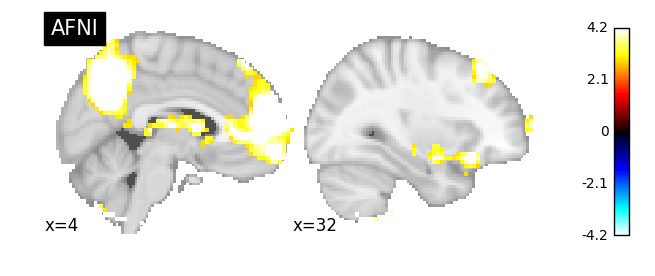

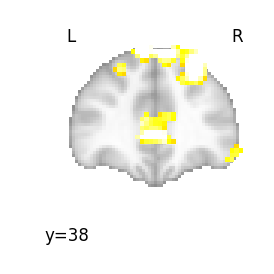

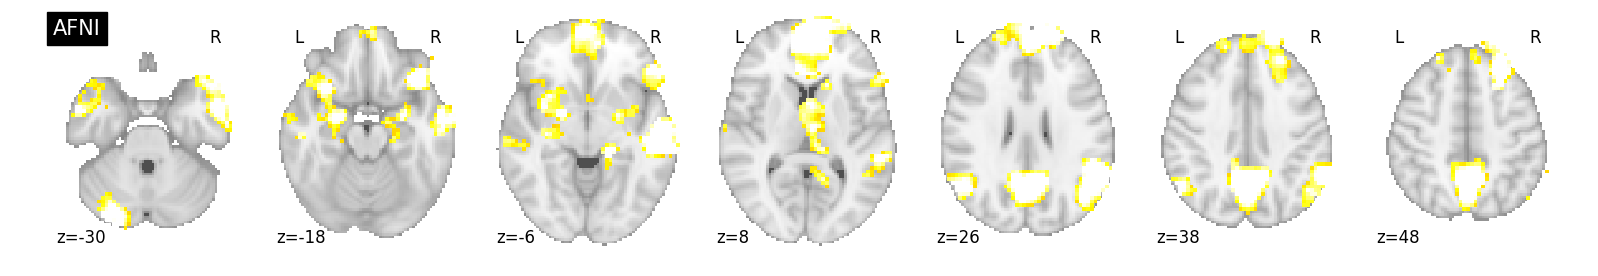

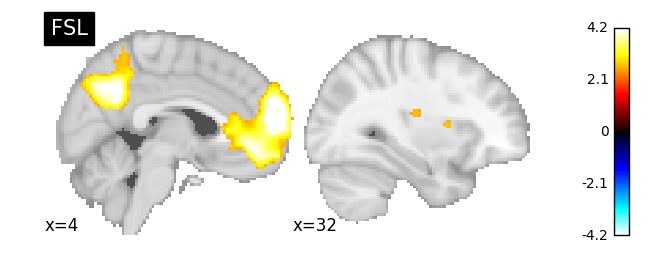

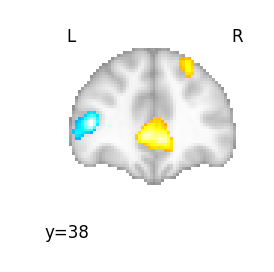

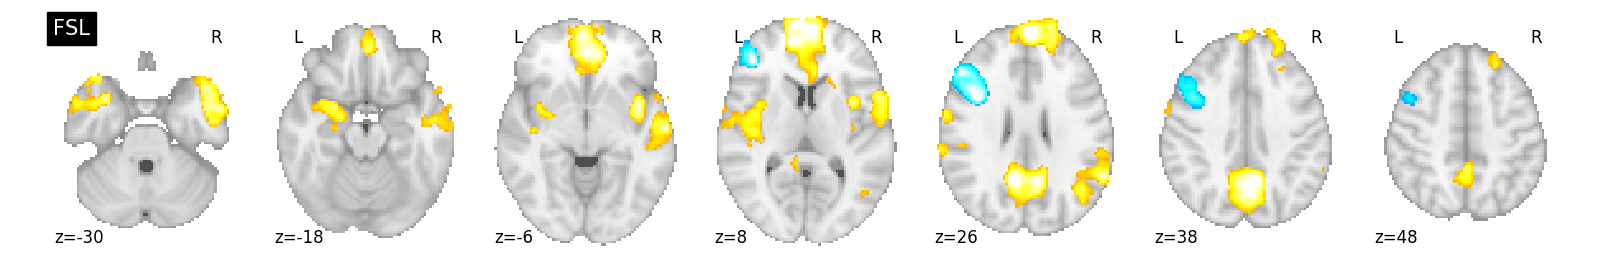

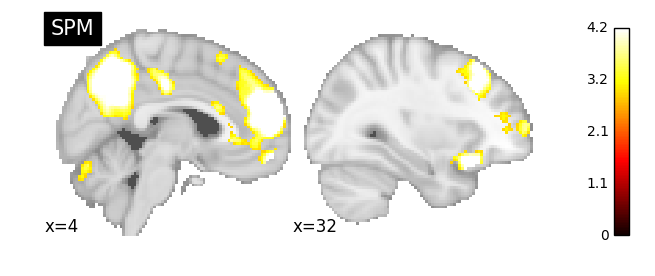

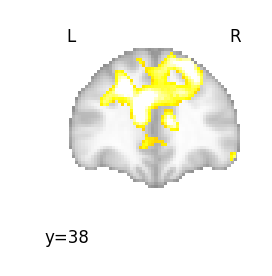

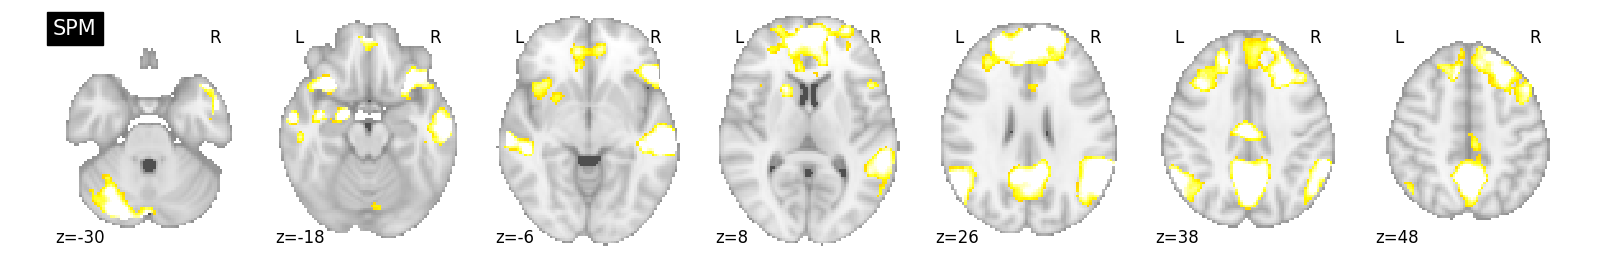

In [6]:
from nilearn import plotting
from nilearn.image import math_img
import numpy as np
from nilearn.masking import apply_mask
from nilearn.image import load_img, new_img_like
from nilearn._utils.niimg_conversions import _safe_get_data
import nibabel as nib

for soft, (mask_file, (exc_set_file, exc_set_file_neg), stat_file) in sorted(exc_sets.items()):
    # Remove NaNs
    n = nib.load(exc_set_file)
    d = n.get_data()
    exc_set_nonan = nib.Nifti1Image(np.nan_to_num(d), n.affine, header=n.header)
    
    n = nib.load(exc_set_file_neg)
    d = n.get_data()
    exc_set_neg_nonan = nib.Nifti1Image(np.nan_to_num(d), n.affine, header=n.header)
    
    # Combine activations and deactivations in a single image 
    to_display = math_img("img1-img2", img1=exc_set_nonan, img2=exc_set_neg_nonan)

    # Display x=4, y=32 and y=38 as in the manuscript
    display = plotting.plot_stat_map(to_display, display_mode='x', cut_coords=[4, 32], draw_cross=False, colorbar=True, 
                           title=soft.upper(), threshold=0.000001, vmax=4.2)
    display = plotting.plot_stat_map(to_display, cut_coords=[38], draw_cross=False, display_mode='y', 
                           threshold=0.000001, colorbar=False, vmax=4.2)
    # Additional plot: slices along z
    display = plotting.plot_stat_map(to_display, cut_coords=[-30, -18, -6, 8, 26, 38, 48], draw_cross=False, display_mode='z', 
                           threshold=0.000001, colorbar=False, vmax=4.2, title=soft.upper())
#     # Analysis mask
#     display = plotting.plot_roi(mask_file, title=soft.upper()+': Analysis mask')

#     # Analysis mask
#     display = plotting.plot_roi(mask_file, title=soft.upper()+': Analysis mask', 
#                                 cut_coords=7, draw_cross=False, display_mode='z')


plotting.show()

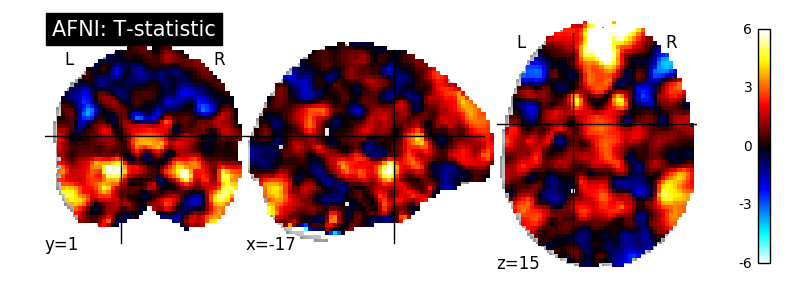

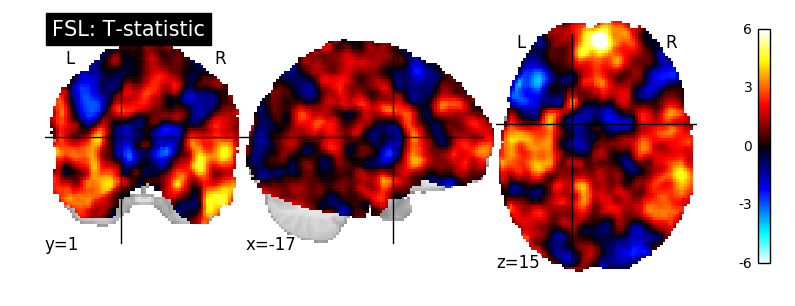

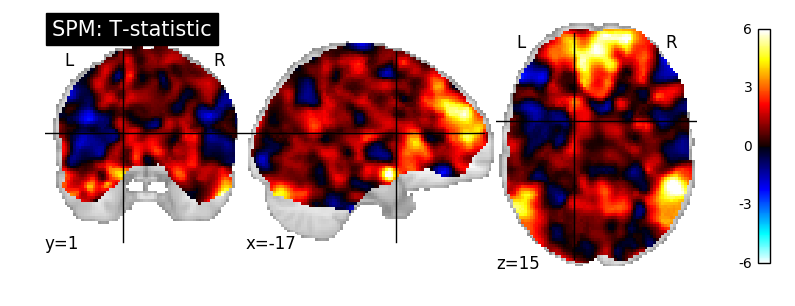

In [7]:
from nilearn import plotting
plotting.plot_stat_map(afni_stat_file, vmax=6, title="AFNI: T-statistic", display_mode='ortho', cut_coords=[-17, 1, 15])
plotting.plot_stat_map(fsl_stat_file, vmax=6, title="FSL: T-statistic", display_mode='ortho', cut_coords=[-17, 1, 15])
plotting.plot_stat_map(spm_stat_file, vmax=6, title="SPM: T-statistic", display_mode='ortho', cut_coords=[-17, 1, 15])

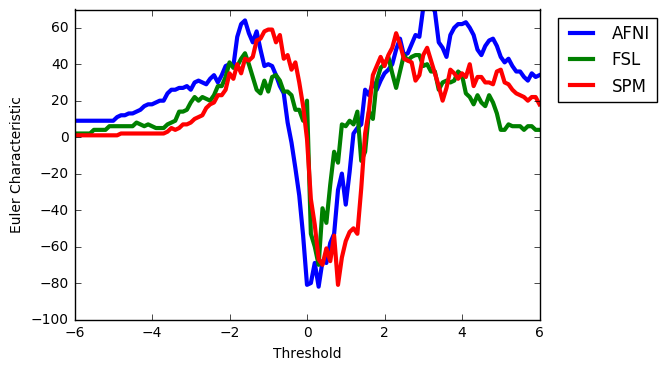

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

afni_euler_chars = pd.read_csv('./input/' + study + '/afni_euler_chars.csv', header=None, names=['Threshold','AFNI EC'])
fsl_euler_chars = pd.read_csv('./input/' + study + '/fsl_euler_chars.csv', usecols=[1], header=None, names=['FSL EC'])
spm_euler_chars = pd.read_csv('./input/' + study + '/spm_euler_chars.csv', usecols=[1], header=None, names=['SPM EC'])
euler_chars = pd.concat([afni_euler_chars, fsl_euler_chars, spm_euler_chars], axis=1)

clm_list = []
for column in euler_chars.columns:
    clm_list.append(column)

thresholds = euler_chars[clm_list[0]].values
afni_ecs = euler_chars[clm_list[1]].values
fsl_ecs = euler_chars[clm_list[2]].values
spm_ecs = euler_chars[clm_list[3]].values

plt.plot(thresholds, afni_ecs, lw = '3')
plt.plot(thresholds, fsl_ecs, lw = '3')
plt.plot(thresholds, spm_ecs, lw = '3')

plt.xlabel('Threshold')
plt.ylabel('Euler Characteristic')

plt.legend(['AFNI', 'FSL', 'SPM'], bbox_to_anchor=(1.27, 1))

plt.ylim([-100,70])

plt.show()

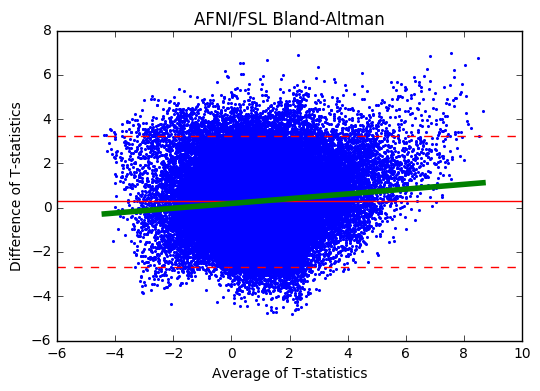

Mean = 0.279546
SD = 1.50496


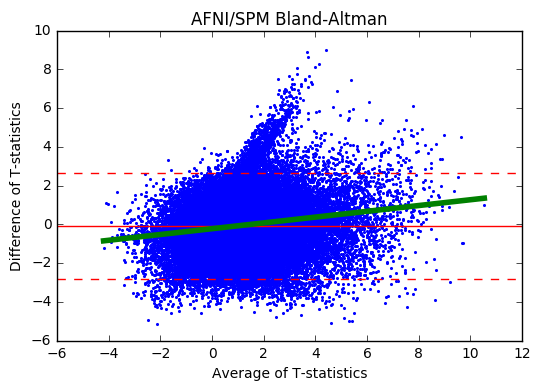

Mean = -0.0780098
SD = 1.40182


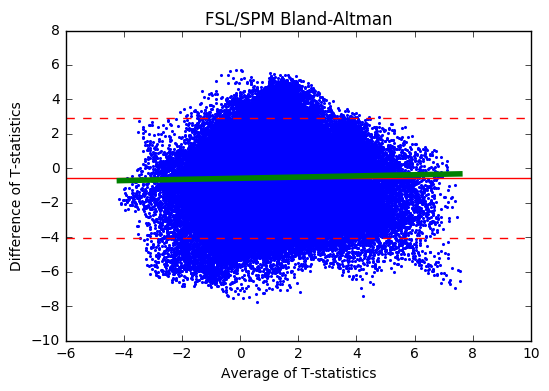

Mean = -0.544769
SD = 1.77459


In [27]:
# Get data from statistic images
afni_res_fsl_dat = nib.load(afni_reslice_fsl).get_data()
afni_res_spm_dat = nib.load(afni_reslice_spm).get_data()
fsl_res_spm_dat = nib.load(fsl_reslice_spm).get_data()
afni_fsl_res_dat = nib.load(afni_fsl_reslice).get_data()
afni_spm_res_dat = nib.load(afni_spm_reslice).get_data()
fsl_spm_res_dat = nib.load(fsl_spm_reslice).get_data()

# # Remove NaNs from resliced images
# afni_res_fsl_dat = np.nan_to_num(afni_res_fsl_dat)
# afni_res_spm_dat = np.nan_to_num(afni_res_spm_dat)
# fsl_res_spm_dat = np.nan_to_num(fsl_res_spm_dat)
# afni_fsl_res_dat = np.nan_to_num(afni_fsl_res_dat)
# afni_spm_res_dat = np.nan_to_num(afni_spm_res_dat)
# fsl_spm_res_dat = np.nan_to_num(fsl_spm_res_dat)

# Get dimensions and reshape data to 2 dimensions
#afni_res_fsl_dim = afni_res_fsl_dat.shape
#afni_res_spm_dim = afni_res_spm_dat.shape
#fsl_res_spm_dim = fsl_res_spm_dat.shape 

#afni_res_fsl_proddim = np.prod(afni_res_fsl_dim)
#afni_res_spm_proddim = np.prod(afni_res_spm_dim)
#fsl_res_spm_proddim = np.prod(fsl_res_spm_dim)

afni_res_fsl_2d = np.reshape(afni_res_fsl_dat, -1)
afni_fsl_res_2d = np.reshape(afni_fsl_res_dat, -1)
afni_res_spm_2d = np.reshape(afni_res_spm_dat, -1)
afni_spm_res_2d = np.reshape(afni_spm_res_dat, -1)
fsl_res_spm_2d = np.reshape(fsl_res_spm_dat, -1)
fsl_spm_res_2d = np.reshape(fsl_spm_res_dat, -1)


def bland_altman_plot(data1, data2, *args, **kwargs):
#     data1     = np.asarray(data1)
#     data2     = np.asarray(data2)

    in_mask_indices = np.logical_not(np.logical_or(
        np.logical_or(np.isnan(data1), np.absolute(data1) < 0.001),
        np.logical_or(np.isnan(data2), np.absolute(data2) < 0.001)))
#     # below is what we want once interpolation is redone with NN
#     in_mask_indices = np.logical_not(np.logical_or(
#         np.logical_or(np.isnan(data1), np.absolute(data1) == 0),
#         np.logical_or(np.isnan(data2), np.absolute(data2) == 0)))

    data1 = data1[in_mask_indices]
    data2 = data2[in_mask_indices]

    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference
    
    plt.scatter(mean, diff, marker = '.', linewidth = '0', *args, **kwargs)
    mean_line = plt.axhline(md,           color='red', linestyle='-')
    pos_95_prct = plt.axhline(md + 1.96*sd, color='red', linestyle='--')
    neg_95_prct = plt.axhline(md - 1.96*sd, color='red', linestyle='--')
    plt.plot(np.unique(mean), np.poly1d(np.polyfit(mean, diff, 1))(np.unique(mean)), color = 'green', lw = 4)
    plt.xlabel('Average of T-statistics')
    plt.ylabel('Difference of T-statistics')
    return md, sd

# np.absolute(afni_fsl_res_2d) < 0.001
# afni_res_fsl_2d[afni_fsl_res_zero_indices] = 0 
bland = bland_altman_plot(afni_res_fsl_2d, afni_fsl_res_2d)
plt.title('AFNI/FSL Bland-Altman')
plt.show()
mean, sd = bland
print "Mean = %s" % mean
print "SD = %s" % sd

# afni_spm_res_zero_indices = np.absolute(afni_spm_res_2d) < 0.001
# afni_res_spm_2d[afni_spm_res_zero_indices] = 0 
bland = bland_altman_plot(afni_res_spm_2d, afni_spm_res_2d)
plt.title('AFNI/SPM Bland-Altman')
plt.show()
mean, sd = bland
print "Mean = %s" % mean
print "SD = %s" % sd

bland = bland_altman_plot(fsl_res_spm_2d, fsl_spm_res_2d)
plt.title('FSL/SPM Bland-Altman')
plt.show()
mean, sd = bland
print "Mean = %s" % mean
print "SD = %s" % sd

In [9]:
# Load up all excursion set images
afni_pos = nib.load(afni_exc_set_file)
afni_neg = nib.load(afni_exc_set_file_neg)
fsl_pos = nib.load(fsl_exc_set_file)
fsl_neg = nib.load(fsl_exc_set_file_neg)
spm_pos = nib.load(spm_exc_set_file)
spm_neg = nib.load(spm_exc_set_file_neg)
afni_fsl_pos = nib.load(afni_fsl_pos_exc_reslice)
afni_fsl_neg = nib.load(afni_fsl_neg_exc_reslice)
afni_spm_pos = nib.load(afni_spm_pos_exc_reslice)
afni_spm_neg = nib.load(afni_spm_neg_exc_reslice)
fsl_spm_pos = nib.load(fsl_spm_pos_exc_reslice) 
fsl_spm_neg = nib.load(fsl_spm_neg_exc_reslice)

# Get data from excursion set images
afni_pos_dat = afni_pos.get_data()
afni_neg_dat = afni_neg.get_data()
fsl_pos_dat = fsl_pos.get_data()
fsl_neg_dat = fsl_neg.get_data()
spm_pos_dat = spm_pos.get_data()
spm_neg_dat = spm_neg.get_data()
afni_fsl_pos_dat = afni_fsl_pos.get_data()
afni_fsl_neg_dat = afni_fsl_neg.get_data()
afni_spm_pos_dat = afni_spm_pos.get_data()
afni_spm_neg_dat = afni_spm_neg.get_data()
fsl_spm_pos_dat = fsl_spm_pos.get_data()
fsl_spm_neg_dat = fsl_spm_neg.get_data()

# Remove NaNs from images
afni_pos_dat = nib.Nifti1Image(np.nan_to_num(afni_pos_dat), afni_pos.affine, header=afni_pos.header).get_data()
afni_neg_dat = nib.Nifti1Image(np.nan_to_num(afni_neg_dat), afni_neg.affine, header=afni_neg.header).get_data()
fsl_pos_dat = nib.Nifti1Image(np.nan_to_num(fsl_pos_dat), fsl_pos.affine, header=fsl_pos.header).get_data()
fsl_neg_dat = nib.Nifti1Image(np.nan_to_num(fsl_neg_dat), fsl_neg.affine, header=fsl_neg.header).get_data()
spm_pos_dat = nib.Nifti1Image(np.nan_to_num(spm_pos_dat), spm_pos.affine, header=spm_pos.header).get_data()
spm_neg_dat = nib.Nifti1Image(np.nan_to_num(spm_neg_dat), spm_neg.affine, header=spm_neg.header).get_data()
afni_fsl_pos_dat = nib.Nifti1Image(np.nan_to_num(afni_fsl_pos_dat), afni_fsl_pos.affine, header=afni_fsl_pos.header).get_data()
afni_fsl_neg_dat = nib.Nifti1Image(np.nan_to_num(afni_fsl_neg_dat), afni_fsl_neg.affine, header=afni_fsl_neg.header).get_data()
afni_spm_pos_dat = nib.Nifti1Image(np.nan_to_num(afni_spm_pos_dat), afni_spm_pos.affine, header=afni_spm_pos.header).get_data()
afni_spm_neg_dat = nib.Nifti1Image(np.nan_to_num(afni_spm_neg_dat), afni_spm_neg.affine, header=afni_spm_pos.header).get_data()
fsl_spm_pos_dat = nib.Nifti1Image(np.nan_to_num(fsl_spm_pos_dat), fsl_spm_pos.affine, header=fsl_spm_pos.header).get_data()
fsl_spm_neg_dat = nib.Nifti1Image(np.nan_to_num(fsl_spm_neg_dat), fsl_spm_neg.affine, header=fsl_spm_neg.header).get_data()
    
def sorrenson_dice(data1, data2):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    data1 = np.absolute(data1)
    data2 = np.absolute(data2)
    
    low_value_indices_data1 = data1 < 0.1
    high_value_indices_data1 = data1 > 0.1
    low_value_indices_data2 = data2 < 0.1
    high_value_indices_data2 = data2 >0.1
    
    intersection_data = data1 
    intersection_data[low_value_indices_data2] = 0 # All values close to 0 in data1 or data2 are 0 in the intersection array
    intersection_indices = intersection_data > 0.1
    intersection_data[intersection_indices] = 1 # All values in the union of data1 and data2 are set to 1
    numerator = 2*np.sum(intersection_data)
    
    data1[low_value_indices_data1] = 0
    data1[high_value_indices_data1] = 1
    data2[low_value_indices_data2] = 0
    data2[high_value_indices_data2] = 1
    denominator = np.sum(data1) + np.sum(data2)
    
    dice_coefficient = numerator/denominator
    return dice_coefficient

afni_fsl_pos_dice = sorrenson_dice(afni_pos_dat, afni_fsl_pos_dat)
afni_fsl_neg_dice = sorrenson_dice(afni_neg_dat, afni_fsl_neg_dat)
afni_spm_pos_dice = sorrenson_dice(afni_pos_dat, afni_spm_pos_dat)
afni_spm_neg_dice = sorrenson_dice(afni_neg_dat, afni_spm_neg_dat)
fsl_spm_pos_dice = sorrenson_dice(fsl_pos_dat, fsl_spm_pos_dat)
fsl_spm_neg_dice = sorrenson_dice(fsl_neg_dat, fsl_spm_neg_dat)

print "AFNI/FSL positive activation dice coefficient = %s" % afni_fsl_pos_dice
print "AFNI/FSL negative activation dice coefficient = %s" % afni_fsl_neg_dice
print "AFNI/SPM positive activation dice coefficient = %s" % afni_spm_pos_dice
print "AFNI/SPM negative activation dice coefficient = %s" % afni_spm_neg_dice
print "FSL/SPM positive activation dice coefficient = %s" % fsl_spm_pos_dice
print "FSL/SPM negative activation dice coefficient = %s" % fsl_spm_neg_dice

AFNI/FSL positive activation dice coefficient = 0.484328567424
AFNI/FSL negative activation dice coefficient = 0.0
AFNI/SPM positive activation dice coefficient = 0.522689386924
AFNI/SPM negative activation dice coefficient = 0.0
FSL/SPM positive activation dice coefficient = 0.354767489996
FSL/SPM negative activation dice coefficient = 0.0


In [22]:
afni = nib.load(afni_reslice_fsl)
afni_dat = afni.get_data()
non_outliers = np.absolute(afni_dat) < 25
afni_dat[non_outliers] = 0

nonzeroind = np.nonzero(afni_dat)[2]
print nonzeroind

[6 5 5 5 6 5 5 5 5 4 4 6 6 6 5 5 5 5 4 4 6 6 5 5 5 5 4 4 6 6 5 5 5 4 5 4 4
 4 6 6 5 5 5 4 5 4 4 4 4 6 6 5 5 5 5 4 4 5 4 4 4 6 6 5 5 5 5 4 4 4 4 6 6 6
 5 5 5 5 4 4 4 4 4 6 6 6 5 5 5 5 4 4 4 4 4 6 6 6 5 5 5 5 4 4 4 4 3 4 6 6 5
 5 5 5 4 4 4 4 3 4 6 6 5 5 5 5 4 4 4 3 4 3 4 6 6 5 5 5 5 4 4 4 3 4 3 6 5 5
 5 4 4 4 4 3 4 3 5 5 5 4 4 4 4 3 4 3 3 6 5 5 5 5 4 4 4 4 3 4 3 3 3 6 5 5 5
 5 4 4 4 4 3 4 3 3 3 6 6 5 5 5 5 4 4 4 4 3 3 3 6 6 5 5 5 4 4 4 4 3 3 3 6 6
 5 5 5 4 4 4 4 3 3 6 6 5 5 5 4 4 4 4 3 6 6 5 5 5 4 4 4 6 6 5 5 5 4 4 4 6 6
 5 5 4 4 4 6 6 5 4 4 4 4 5 5 4 4 4 4 5 5 4 4 4 5 5 4 4 4 4]
